# Bike Sharing Assignment

## linear regression

This is a data sef of **BoomBikes** by build a multiple linear regression model for the prediction of demand for shared bikes.

#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### *Data understanding, preparation and EDA*
- importing libraries
- understanding structure of data


In [1]:
 # importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#linear regression lib
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#for ignoring warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data set 
df = pd.read_csv(r"C:\Users\raghu\Downloads\day.csv")

In [3]:
# checking top 5 rows of data 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#to get to know columns , wrt datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#describe data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data quality checks

In [6]:
#checking any null value and shape of data set
count=df.isnull().sum()
print(count)
print("shape of data set =")
df.shape 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
shape of data set =


(730, 16)

In [7]:
#colums  in data set 
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#create new df with necessary and imp columns with out droping other columns 
new_df = df[[ 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp','atemp' ,'hum', 'windspeed',
        'cnt']]

In [9]:
#checking new_df head
new_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
#replace catogorical variables by its name 
new_df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
new_df['weathersit'].replace({1:"Clear Few Clouds",2:"Mist cloudy",3:"Light rain Light snow Thunderstorm",4:'Heavy Rain Ice Pallets Thunderstorm Mist'},inplace=True)
new_df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
new_df['mnth'].replace({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"},inplace=True)
new_df.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
725,spring,1,dec,0,Thursday,1,Mist cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,Friday,1,Mist cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,Saturday,0,Mist cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,Sunday,0,Clear Few Clouds,10.489153,11.58500,48.3333,23.500518,1796
729,spring,1,dec,0,Monday,1,Mist cloudy,8.849153,11.17435,57.7500,10.374682,2729


In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### handling Categorical variables

In [12]:
#category variables
new_df['season']=new_df['season'].astype('category')
new_df['weathersit']=new_df['weathersit'].astype('category')
new_df['mnth']=new_df['mnth'].astype('category')
new_df['weekday']=new_df['weekday'].astype('category')

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### EDA  

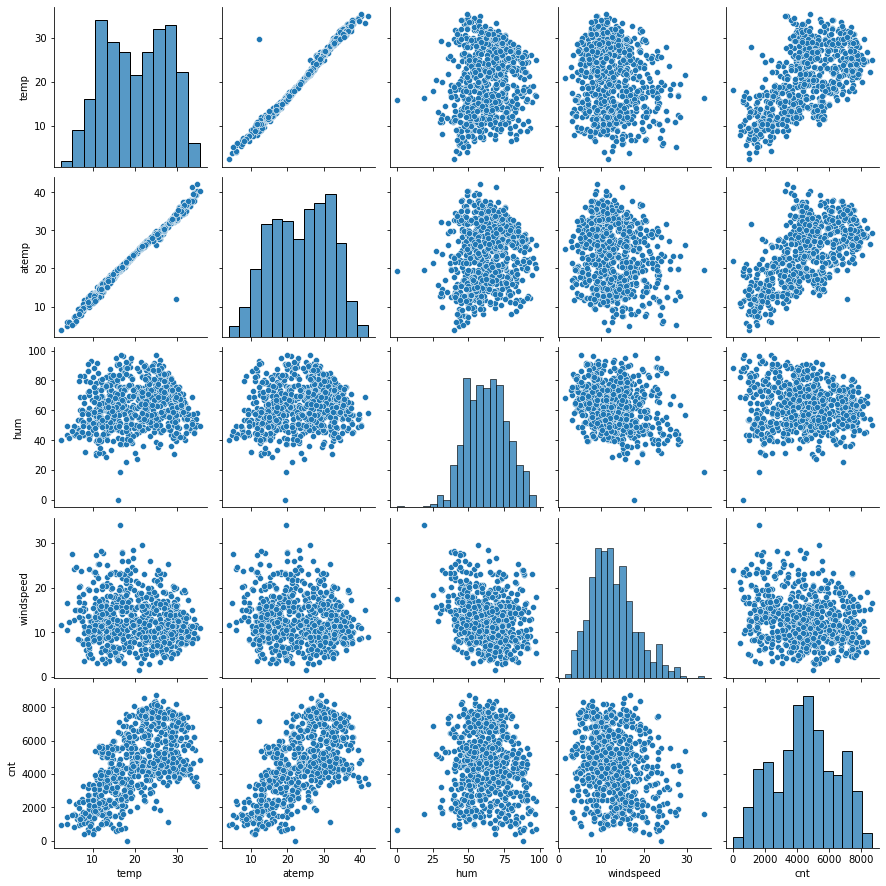

In [14]:
#ploting pair plot of numerical variables
sns.pairplot(new_df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()


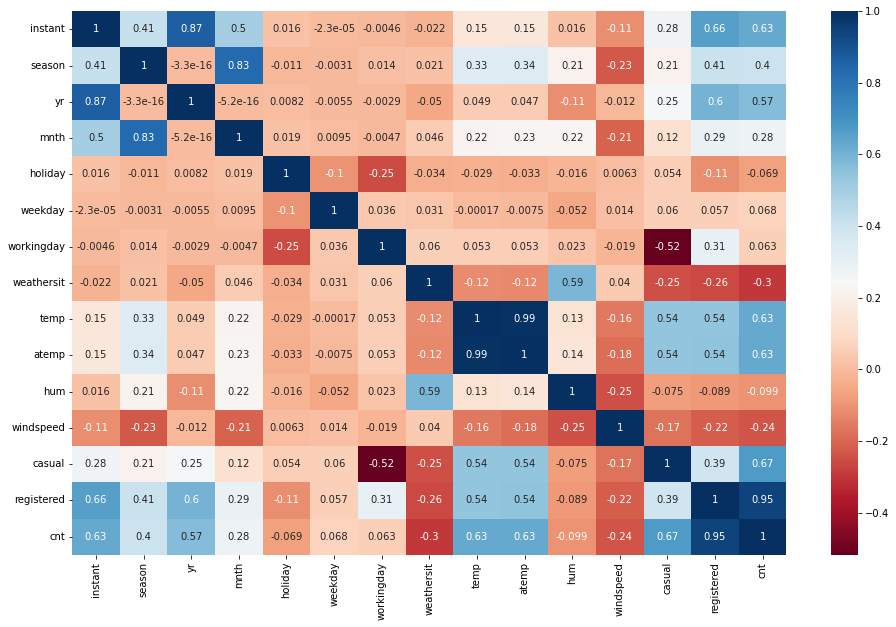

In [15]:
#let check the correlation 
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()

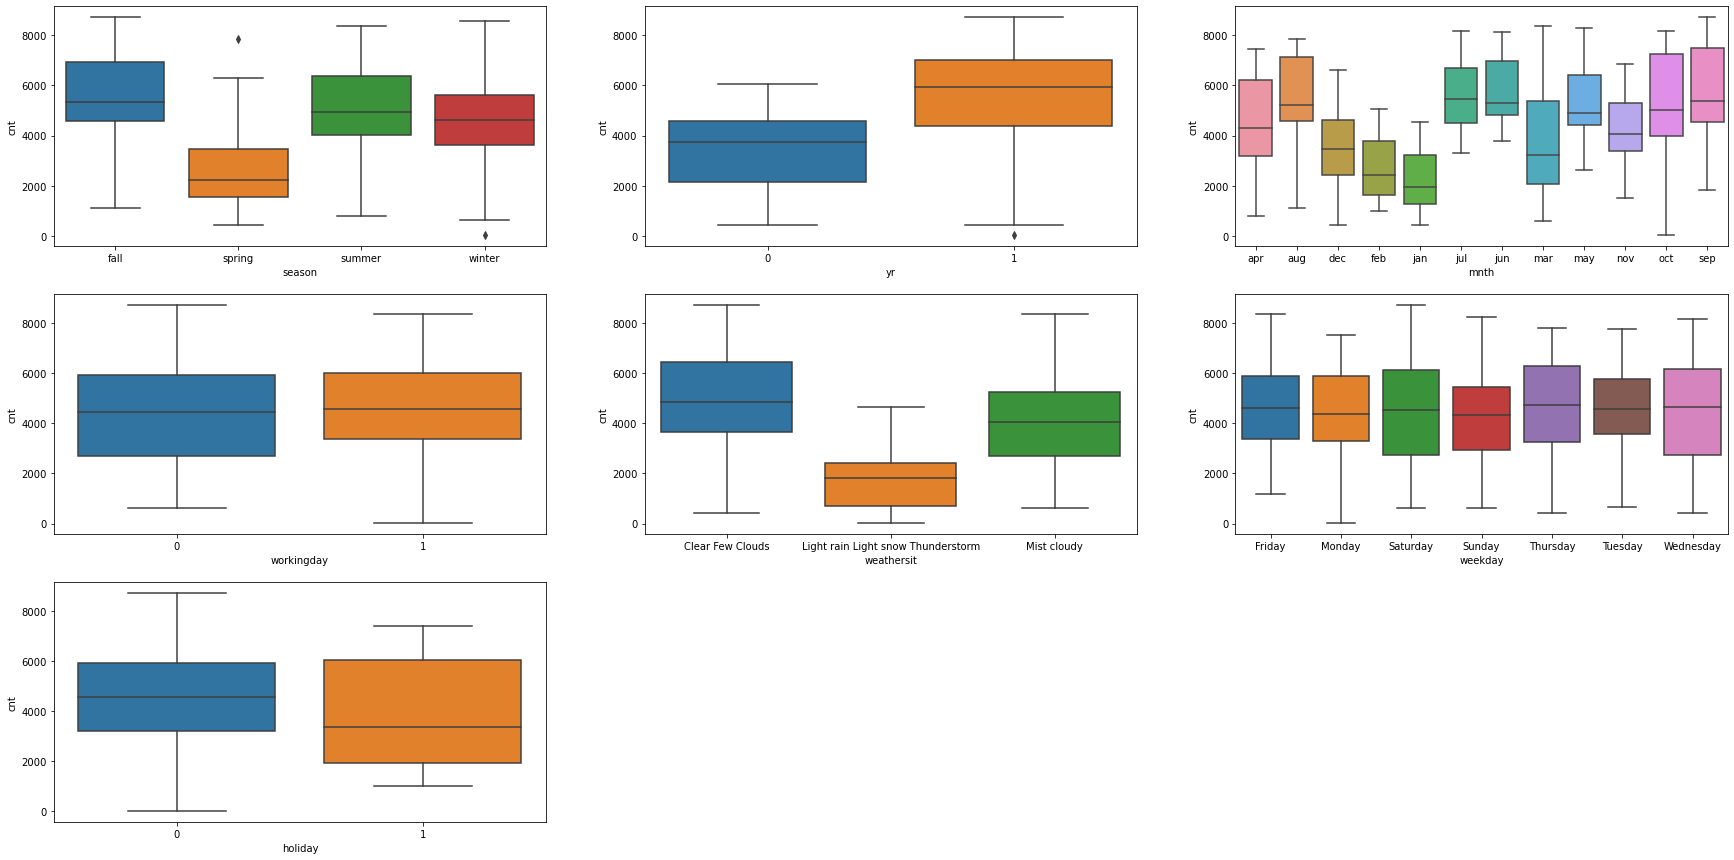

In [16]:
#box plot for all the cetegory variables to perform with resp to target variable that is cnt 

plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = new_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = new_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = new_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = new_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = new_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = new_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = new_df)
plt.show()

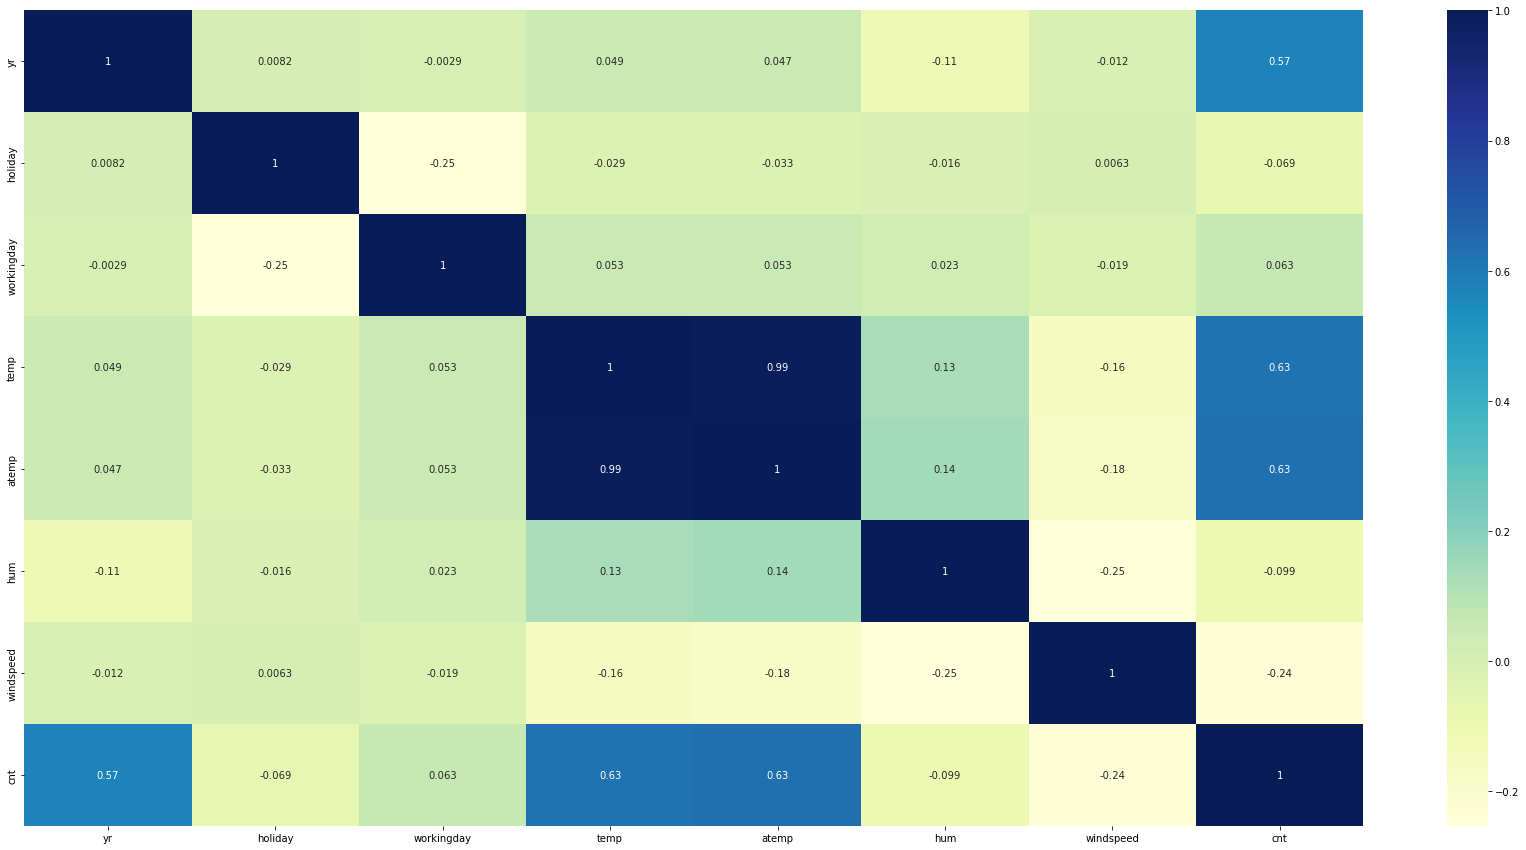

In [17]:
plt.figure(figsize = (30, 15))
sns.heatmap(new_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

### creating Dummy variables

In [18]:
#creating the dummy variable and droping the variabes which dummy created
new_df = pd.get_dummies(new_df, drop_first=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             730 non-null    int64  
 1   holiday                                        730 non-null    int64  
 2   workingday                                     730 non-null    int64  
 3   temp                                           730 non-null    float64
 4   atemp                                          730 non-null    float64
 5   hum                                            730 non-null    float64
 6   windspeed                                      730 non-null    float64
 7   cnt                                            730 non-null    int64  
 8   season_spring                                  730 non-null    uint8  
 9   season_summer                                  730 non

#### splitting data 

In [19]:
#import train_test_split to splitting data
from sklearn.model_selection import train_test_split

In [20]:
#train and test as 70:30
np.random.seed(0)
new_df_train, new_df_test = train_test_split(new_df, train_size = 0.70, test_size = 0.30, random_state = 365)

In [21]:
new_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain Light snow Thunderstorm,weathersit_Mist cloudy
414,1,0,0,11.480000,13.28940,51.5833,16.958504,2689,1,0,...,0,0,0,0,1,0,0,0,0,1
290,0,0,1,21.832500,26.13605,70.1667,7.375829,4748,0,0,...,1,0,0,0,0,0,1,0,0,1
60,0,0,1,13.735000,16.00355,44.9583,20.624811,2134,1,0,...,0,0,0,0,0,0,0,1,0,0
331,0,0,1,20.642598,24.50610,74.3043,9.522174,3867,0,0,...,0,0,1,0,0,0,0,0,0,0
635,1,0,1,25.385847,29.29315,69.0000,10.999993,7415,0,0,...,0,1,0,0,0,0,0,0,0,1


In [22]:
#checking test 
new_df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain Light snow Thunderstorm,weathersit_Mist cloudy
444,1,0,1,21.798347,25.66290,82.1250,6.000406,6230,0,1,...,0,0,0,0,0,0,0,1,0,1
11,0,0,1,7.081807,8.02365,59.9545,20.410009,1162,1,0,...,0,0,0,0,0,0,0,1,0,0
69,0,0,1,12.977402,15.25000,64.9565,15.608990,1977,1,0,...,0,0,0,0,0,0,0,0,0,1
363,0,0,1,12.778347,15.94060,63.6667,9.000579,2999,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,1,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
#train
new_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 414 to 692
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             510 non-null    int64  
 1   holiday                                        510 non-null    int64  
 2   workingday                                     510 non-null    int64  
 3   temp                                           510 non-null    float64
 4   atemp                                          510 non-null    float64
 5   hum                                            510 non-null    float64
 6   windspeed                                      510 non-null    float64
 7   cnt                                            510 non-null    int64  
 8   season_spring                                  510 non-null    uint8  
 9   season_summer                                  510 n

In [24]:
new_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 444 to 369
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             219 non-null    int64  
 1   holiday                                        219 non-null    int64  
 2   workingday                                     219 non-null    int64  
 3   temp                                           219 non-null    float64
 4   atemp                                          219 non-null    float64
 5   hum                                            219 non-null    float64
 6   windspeed                                      219 non-null    float64
 7   cnt                                            219 non-null    int64  
 8   season_spring                                  219 non-null    uint8  
 9   season_summer                                  219 n

#### scalling 

In [25]:
#scalling numeric
from sklearn.preprocessing import MinMaxScaler

In [26]:
# using minmaxscaler 
scaler = MinMaxScaler()

In [27]:
# only numeric variables 
num_vars = ['temp','atemp','hum', 'windspeed','cnt']

new_df_train[num_vars] = scaler.fit_transform(new_df_train[num_vars])

In [28]:
new_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain Light snow Thunderstorm,weathersit_Mist cloudy
414,1,0,0,0.275214,0.245093,0.530420,0.551138,0.306834,1,0,...,0,0,0,0,1,0,0,0,0,1
290,0,0,1,0.589842,0.582352,0.721508,0.171631,0.543718,0,0,...,1,0,0,0,0,0,1,0,0,1
60,0,0,1,0.343747,0.316347,0.462296,0.696336,0.242982,1,0,...,0,0,0,0,0,0,0,1,0,0
331,0,0,1,0.553679,0.539562,0.764054,0.256634,0.442361,0,0,...,0,0,1,0,0,0,0,0,0,0
635,1,0,1,0.697833,0.665235,0.709512,0.315161,0.850552,0,0,...,0,1,0,0,0,0,0,0,0,1


In [29]:
new_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain Light snow Thunderstorm,weathersit_Mist cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.517647,0.027451,0.694118,0.543922,0.518324,0.643103,0.392627,0.516365,0.247059,0.274510,...,0.082353,0.068627,0.154902,0.143137,0.135294,0.141176,0.145098,0.145098,0.027451,0.350980
std,0.500179,0.163554,0.461233,0.230381,0.216238,0.150191,0.207242,0.223040,0.431725,0.446705,...,0.275172,0.253068,0.362166,0.350557,0.342373,0.348545,0.352545,0.352545,0.163554,0.477745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.350497,0.339940,0.520595,0.241353,0.362546,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.550903,0.537599,0.641174,0.368268,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.741185,0.694255,0.750964,0.506584,0.692188,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### linear model

In [30]:
#creating x and y for building model
y_train = new_df_train.pop('cnt')
X_train = new_df_train

In [31]:
X_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain Light snow Thunderstorm,weathersit_Mist cloudy
414,1,0,0,0.275214,0.245093,0.530420,0.551138,1,0,0,...,0,0,0,0,1,0,0,0,0,1
290,0,0,1,0.589842,0.582352,0.721508,0.171631,0,0,1,...,1,0,0,0,0,0,1,0,0,1
60,0,0,1,0.343747,0.316347,0.462296,0.696336,1,0,0,...,0,0,0,0,0,0,0,1,0,0
331,0,0,1,0.553679,0.539562,0.764054,0.256634,0,0,1,...,0,0,1,0,0,0,0,0,0,0
635,1,0,1,0.697833,0.665235,0.709512,0.315161,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [32]:
y_train.head()

414    0.306834
290    0.543718
60     0.242982
331    0.442361
635    0.850552
Name: cnt, dtype: float64

In [33]:
#cheching rfe variables of 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 13),
 ('mnth_may', False, 10),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 7),
 ('mnth_sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 3),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 15),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 14),
 ('weathersit_Light rain Light snow Thunderstorm', True, 1),
 ('weathersit_Mist cloudy', True, 1)]

In [35]:
column = X_train.columns[rfe.support_]
column

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sep', 'weathersit_Light rain Light snow Thunderstorm',
       'weathersit_Mist cloudy'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_aug', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [37]:
X_train_rfe = X_train[column]

## Model building

#### stats model

###  Model 1
#####  - vif 1 , - ols 1




In [38]:

# check vif before droping 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,atemp,345.96
1,temp,345.25
3,hum,23.46
5,season_spring,4.74
4,windspeed,4.18
6,season_winter,2.68
9,mnth_jan,2.68
14,weathersit_Mist cloudy,2.38
8,mnth_feb,2.18
0,yr,2.12


In [39]:
import statsmodels.api as sm

#constant 
X_train_lm1 = sm.add_constant(X_train_rfe)

#1st fit model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [40]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.38e-185
Time:                        19:38:35   Log-Likelihood:                 509.62
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     494   BIC:                            -919.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [41]:
#high vif
X_train_new = X_train_rfe.drop(["temp"], axis = 1)


### Model 2

####  vif 2 , ols 2

In [42]:
#vif2
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,23.44
1,atemp,16.82
4,season_spring,4.70
3,windspeed,4.04
8,mnth_jan,2.68
5,season_winter,2.63
13,weathersit_Mist cloudy,2.38
7,mnth_feb,2.18
0,yr,2.11
10,mnth_nov,1.85


In [43]:
#constant
X_train_lm2 = sm.add_constant(X_train_new)

#2nd fit model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [44]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.13e-186
Time:                        19:38:36   Log-Likelihood:                 508.15
No. Observations:                 510   AIC:                            -986.3
Df Residuals:                     495   BIC:                            -922.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [45]:
#high vif
X_train_new = X_train_new.drop(["hum"], axis = 1)

### Model 3


#### vif 3 ,ols 3

In [46]:
#vif 3
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,atemp,4.71
3,season_spring,4.45
2,windspeed,4.02
7,mnth_jan,2.51
4,season_winter,2.40
0,yr,2.11
6,mnth_feb,2.11
9,mnth_nov,1.80
12,weathersit_Mist cloudy,1.57
5,mnth_dec,1.56


In [47]:
#constant
X_train_lm3 = sm.add_constant(X_train_new)

#3rd fit model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [48]:
print(lr3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.10e-182
Time:                        19:38:36   Log-Likelihood:                 496.58
No. Observations:                 510   AIC:                            -965.2
Df Residuals:                     496   BIC:                            -905.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [49]:
#droping mnth feb high p value
X_train_new = X_train_new.drop(["mnth_feb"], axis = 1)

### Model 4

#### vif 4 ,ols 4

In [50]:
# vif3
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.69
2,windspeed,4.02
3,season_spring,2.39
4,season_winter,2.34
0,yr,2.11
8,mnth_nov,1.78
6,mnth_jan,1.72
11,weathersit_Mist cloudy,1.57
7,mnth_jul,1.44
5,mnth_dec,1.38


In [51]:
#constant
X_train_lm4 = sm.add_constant(X_train_new)
#4th fit model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [52]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.54e-183
Time:                        19:38:37   Log-Likelihood:                 495.19
No. Observations:                 510   AIC:                            -964.4
Df Residuals:                     497   BIC:                            -909.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [53]:
#high p
X_train_new = X_train_new.drop(["mnth_sep"], axis = 1)

### model 5 

#### vif 5, ols 5

In [54]:
# 5th vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.50
2,windspeed,4.01
3,season_spring,2.39
4,season_winter,2.32
0,yr,2.11
8,mnth_nov,1.75
6,mnth_jan,1.72
10,weathersit_Mist cloudy,1.56
7,mnth_jul,1.40
5,mnth_dec,1.37


In [55]:
#con
X_train_lm5 = sm.add_constant(X_train_new)
#5th fit model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [56]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.85e-182
Time:                        19:38:37   Log-Likelihood:                 490.70
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     498   BIC:                            -906.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [57]:
X_train_new = X_train_new.drop(["mnth_jan"], axis = 1)

### Model 6

#### vif 6, ols 6

In [58]:
#vif 6
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.43
2,windspeed,4.00
4,season_winter,2.29
0,yr,2.10
7,mnth_nov,1.74
3,season_spring,1.69
9,weathersit_Mist cloudy,1.55
6,mnth_jul,1.40
5,mnth_dec,1.30
8,weathersit_Light rain Light snow Thunderstorm,1.08


In [59]:
X_train_lm6 = sm.add_constant(X_train_new)
#6th fit model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [60]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.47e-181
Time:                        19:38:38   Log-Likelihood:                 486.18
No. Observations:                 510   AIC:                            -950.4
Df Residuals:                     499   BIC:                            -903.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [61]:
X_train_new = X_train_new.drop(["mnth_nov"], axis = 1)


### Model 7

#### vif 7 ,ols 7

In [62]:
#7th vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.37
2,windspeed,3.93
0,yr,2.10
3,season_spring,1.69
8,weathersit_Mist cloudy,1.55
4,season_winter,1.46
6,mnth_jul,1.40
5,mnth_dec,1.21
7,weathersit_Light rain Light snow Thunderstorm,1.07


In [63]:
X_train_lm7 = sm.add_constant(X_train_new)
#7th fit model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [64]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.66e-180
Time:                        19:38:38   Log-Likelihood:                 480.82
No. Observations:                 510   AIC:                            -941.6
Df Residuals:                     500   BIC:                            -899.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [65]:
X_train_new = X_train_new.drop(["mnth_dec"], axis = 1)

### Model 8

In [66]:
#8th vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.35
2,windspeed,3.93
0,yr,2.09
3,season_spring,1.63
7,weathersit_Mist cloudy,1.53
5,mnth_jul,1.39
4,season_winter,1.35
6,weathersit_Light rain Light snow Thunderstorm,1.07


In [67]:
X_train_lm8 = sm.add_constant(X_train_new)
#8th fit model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [68]:
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.13e-180
Time:                        19:38:39   Log-Likelihood:                 477.65
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     501   BIC:                            -899.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [69]:
X_train_new = X_train_new.drop(["season_winter"], axis = 1)

### Model 9

In [70]:
#9th vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.33
2,windspeed,3.85
0,yr,2.05
3,season_spring,1.54
6,weathersit_Mist cloudy,1.50
4,mnth_jul,1.36
5,weathersit_Light rain Light snow Thunderstorm,1.05


In [71]:
X_train_lm9 = sm.add_constant(X_train_new)
#9th fit model
lr9 = sm.OLS(y_train, X_train_lm9).fit()

In [72]:
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     317.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          6.68e-180
Time:                        19:38:39   Log-Likelihood:                 473.51
No. Observations:                 510   AIC:                            -931.0
Df Residuals:                     502   BIC:                            -897.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

###  Residual analysis

In [73]:
#predection
y_train_pred = lr9.predict(X_train_lm9)
res = (y_train - y_train_pred)

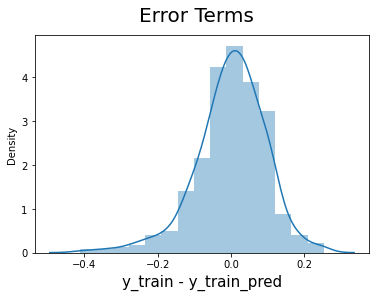

In [74]:
#dist plot for res vs errors
fig = plt.figure()
sns.distplot((res), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('y_train - y_train_pred', fontsize = 15)        
plt.show()

In [75]:
X_train_lm9.columns

Index(['const', 'yr', 'atemp', 'windspeed', 'season_spring', 'mnth_jul',
       'weathersit_Light rain Light snow Thunderstorm',
       'weathersit_Mist cloudy'],
      dtype='object')

In [76]:
num_vars=['atemp','hum','windspeed','cnt']
new_df_test[num_vars] = scaler.fit_transform(new_df_test[num_vars])

In [77]:
new_df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain Light snow Thunderstorm,weathersit_Mist cloudy
444,1,0,1,21.798347,0.599255,0.809371,0.138467,0.737505,0,1,...,0,0,0,0,0,0,0,1,0,1
11,0,0,1,7.081807,0.089123,0.526042,0.581843,0.092967,1,0,...,0,0,0,0,0,0,0,1,0,0
69,0,0,1,12.977402,0.298111,0.589965,0.434118,0.196617,1,0,...,0,0,0,0,0,0,0,0,0,1
363,0,0,1,12.778347,0.318084,0.573482,0.230781,0.326593,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,8.057402,0.159061,0.397162,0.301676,0.137225,1,0,...,0,0,0,0,0,0,0,0,0,1


In [78]:
new_df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain Light snow Thunderstorm,weathersit_Mist cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.456621,0.031963,0.662100,20.279707,0.544268,0.568753,0.332899,0.515894,0.246575,0.200913,...,0.091324,0.114155,0.118721,0.141553,0.164384,0.146119,0.136986,0.132420,0.031963,0.305936
std,0.499256,0.176306,0.474078,7.349292,0.230434,0.171134,0.157054,0.244844,0.432005,0.401601,...,0.288730,0.318728,0.324202,0.349389,0.371472,0.354034,0.344621,0.339723,0.176306,0.461858
min,0.000000,0.000000,0.000000,3.957390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.598326,0.343634,0.453673,0.223721,0.343317,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,19.987500,0.555418,0.567093,0.312833,0.527152,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.991673,0.739404,0.692225,0.420518,0.679639,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,34.371653,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
y_test = new_df_test.pop('cnt')
X_test = new_df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 444 to 369
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             219 non-null    int64  
 1   holiday                                        219 non-null    int64  
 2   workingday                                     219 non-null    int64  
 3   temp                                           219 non-null    float64
 4   atemp                                          219 non-null    float64
 5   hum                                            219 non-null    float64
 6   windspeed                                      219 non-null    float64
 7   season_spring                                  219 non-null    uint8  
 8   season_summer                                  219 non-null    uint8  
 9   season_winter                                  219 n

In [80]:
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm9 = sm.add_constant(X_test)
X_test_lm9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 444 to 369
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   const                                          219 non-null    float64
 1   yr                                             219 non-null    int64  
 2   atemp                                          219 non-null    float64
 3   windspeed                                      219 non-null    float64
 4   season_spring                                  219 non-null    uint8  
 5   mnth_jul                                       219 non-null    uint8  
 6   weathersit_Light rain Light snow Thunderstorm  219 non-null    uint8  
 7   weathersit_Mist cloudy                         219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 9.4 KB


In [81]:
y_pred = lr9.predict(X_test_lm9)

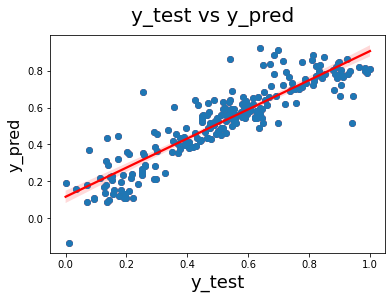

In [82]:
#scatter plot for spreading
fig = plt.figure()
sns.regplot(x=y_test,y=y_pred ,fit_reg=True,color="red")
plt.scatter(y_test, y_pred,)

fig.suptitle('y_test vs y_pred', fontsize = 20)        
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [83]:
#checking r^2
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8058780993061125

In [84]:
r2=0.8058780993061125
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7994380362499172

#### Result

- R^2 : 0.8058780993061125
- Adjusted R^2 :0.7994380362499172

error is low concider as good model

#### report

As per our final Model, the top 3 predictor variables that influences the bike booking are:

- Temperature (atemp) - A coefficient value of ‘0.4212’ indicated that a unit increase in atemp variable increases the bike hire numbers by 42%.
- weathersit_Light rain Light snow Thunderstorm(weathersit_3) - A coefficient value of ‘-0.2752’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 27%
- Year (yr) - A coefficient value of ‘0.2366’ indicated that a unit increase in yr variable increases the bike hire numbers by 23%